Raw: (28085, 1800) (28085,)
Train: 19659 | AFib 2224 (11.31%), Normal 17435 (88.69%)
Val: 4213 | AFib 477 (11.32%), Normal 3736 (88.68%)
Test: 4213 | AFib 476 (11.30%), Normal 3737 (88.70%)
Class weights: {0: np.float64(0.5637797533696587), 1: np.float64(4.419739208633094)}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ ecg_window (InputLayer)         │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       461,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ afib_prob (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,809 (1.92 MB)

 Trainable params: 503,041 (1.92 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - acc: 0.5454 - auc: 0.5675 - loss: 0.7732 - prec: 0.1349 - rec: 0.5576 - val_acc: 0.3012 - val_auc: 0.6715 - val_loss: 0.9550 - val_prec: 0.1323 - val_rec: 0.9308 - learning_rate: 0.0010
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6539 - auc: 0.7220 - loss: 0.6205 - prec: 0.1974 - rec: 0.6718 - val_acc: 0.4358 - val_auc: 0.7671 - val_loss: 0.9080 - val_prec: 0.1607 - val_rec: 0.9434 - learning_rate: 0.0010
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7241 - auc: 0.8063 - loss: 0.5387 - prec: 0.2546 - rec: 0.7460 - val_acc: 0.5906 - val_auc: 0.7976 - val_loss: 0.7380 - val_prec: 0.2000 - val_rec: 0.8721 - learning_rate: 0.0010
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7691 - auc: 0.8543 - loss: 0.4761 - prec: 0.3011 - rec: 0.7878 - val_acc: 0.6696 - val_auc: 0.8163 - val_loss: 0.6463 - val_prec: 0.2326 - val_rec: 0.8344 - learning_rate: 0.0010
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/st

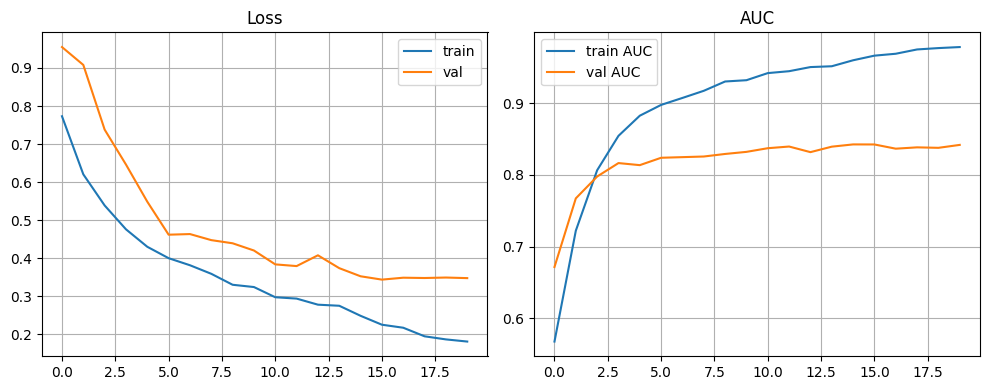

Val AUC = 0.845 | Best val F1 = 0.462 at threshold = 0.51

=== Test metrics (threshold-tuned) ===
ROC-AUC: 0.856
              precision    recall  f1-score   support

      Normal       0.94      0.89      0.91      3737
        AFib       0.39      0.56      0.46       476

    accuracy                           0.85      4213
   macro avg       0.66      0.72      0.68      4213
weighted avg       0.88      0.85      0.86      4213

Confusion Matrix:
 [[3316  421]
 [ 211  265]]

=== Test metrics (threshold=0.5) ===
              precision    recall  f1-score   support

      Normal       0.94      0.89      0.91      3737
        AFib       0.38      0.56      0.46       476

    accuracy                           0.85      4213
   macro avg       0.66      0.72      0.68      4213
weighted avg       0.88      0.85      0.86      4213

Confusion Matrix:
 [[3309  428]
 [ 209  267]]


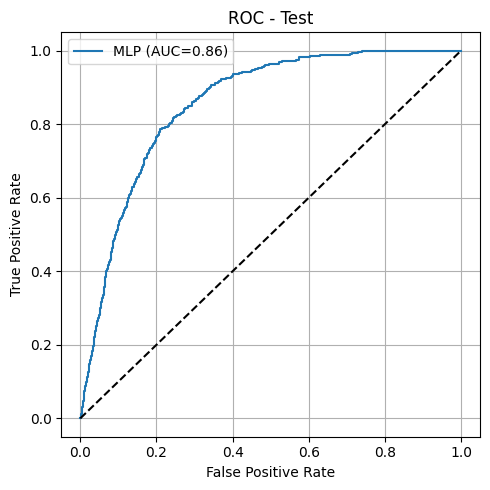

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, callbacks, Model

DATA_PATH = "mitdb_windows_5s_binary_afib.npz"   # raw windows: X.shape=(N, 1800), y in {0,1}
RANDOM_STATE = 42

# Load & split
d = np.load(DATA_PATH)
X, y = d["X"], d["y"].astype(int)
print("Raw:", X.shape, y.shape)  # e.g., (28085, 1800) (28085,)

# Stratified 70/15/15 split (same scheme as Phase 2A)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=RANDOM_STATE
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=RANDOM_STATE
)

def summarize(name, yv):
    n = len(yv); af = int(yv.sum())
    print(f"{name}: {n} | AFib {af} ({af/n:.2%}), Normal {n-af} ({1-af/n:.2%})")

summarize("Train", y_train)
summarize("Val", y_val)
summarize("Test", y_test)



# Class weights 
# avoid leaks
n0 = (y_train == 0).sum()
n1 = (y_train == 1).sum()
n  = len(y_train)
class_weight = {
    0: (1 / n0) * (n / 2.0),
    1: (1 / n1) * (n / 2.0),
}
print("Class weights:", class_weight)

#MLP
input_len = X_train.shape[1]  # 1800

inputs = layers.Input(shape=(input_len,), name="ecg_window")
x = layers.Dense(256, activation="relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1, activation="sigmoid", name="afib_prob")(x)  # binary output

model = Model(inputs, outputs)
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="acc"),
        tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Precision(name="prec"),
        tf.keras.metrics.Recall(name="rec"),
    ],
)

early = callbacks.EarlyStopping(
    monitor="val_auc", mode="max", patience=5, restore_best_weights=True
)

lr_sched = callbacks.ReduceLROnPlateau(
    monitor="val_auc", mode="max", factor=0.5, patience=2, min_lr=1e-5, verbose=1
)

# train
hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    class_weight=class_weight,
    callbacks=[early, lr_sched],
    verbose=1
)

# ploit
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="val")
plt.title("Loss")
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(hist.history["auc"], label="train AUC")
plt.plot(hist.history["val_auc"], label="val AUC")
plt.title("AUC")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()


# Use validation set to pick the classification threshold that maximizes F1 (or a recall target)
val_probs = model.predict(X_val, verbose=0).ravel()
fpr, tpr, thr = roc_curve(y_val, val_probs)
auc_val = roc_auc_score(y_val, val_probs)

best_f1, best_thr = -1, 0.5
for t in np.linspace(0.1, 0.9, 81):
    pred = (val_probs >= t).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(y_val, pred, average="binary", zero_division=0)
    if f1 > best_f1:
        best_f1, best_thr = f1, t

print(f"Val AUC = {auc_val:.3f} | Best val F1 = {best_f1:.3f} at threshold = {best_thr:.2f}")

# Test eval
test_probs = model.predict(X_test, verbose=0).ravel()
test_auc = roc_auc_score(y_test, test_probs)

# Use tuned threshold
test_pred = (test_probs >= best_thr).astype(int)

print("\n=== Test metrics (threshold-tuned) ===")
print("ROC-AUC:", round(test_auc, 3))
print(classification_report(y_test, test_pred, target_names=["Normal","AFib"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

#  default 0.5 threshold for comparison
test_pred_05 = (test_probs >= 0.5).astype(int)
print("\n=== Test metrics (threshold=0.5) ===")
print(classification_report(y_test, test_pred_05, target_names=["Normal","AFib"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred_05))

# ROC Curve 
fpr_te, tpr_te, _ = roc_curve(y_test, test_probs)
plt.figure(figsize=(5,5))
plt.plot(fpr_te, tpr_te, label=f"MLP (AUC={test_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC - Test")
plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()
